In [1]:
pip install pandas scikit-learn xgboost matplotlib seaborn streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('/customer_churn_prediction/data/Telco-Customer-Churn.csv')
print(df.shape)

(7043, 21)


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [10]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3415,1625-JAIIY,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,One year,Yes,Electronic check,83.00,5685.8,Yes
4376,0853-NWIFK,Female,0,No,No,45,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,100.30,4483.95,No
1482,9290-SHCMB,Female,1,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.85,1235.55,No
3069,1784-BXEFA,Female,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.55,187.35,No
6624,9888-ZCUMM,Male,0,Yes,Yes,64,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.05,3845.45,No


In [11]:
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
print("✅ Cleaning Complete. Final shape:", df.shape)

✅ Cleaning Complete. Final shape: (7032, 20)


In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [15]:
print("Encoded shape:", df_encoded.shape)

Encoded shape: (7032, 31)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 30)
Test shape: (1407, 30)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:07:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [20]:
print("✅ All 3 models trained successfully!")

✅ All 3 models trained successfully!


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [22]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [23]:
print("🔹 Logistic Regression")
evaluate_model(log_model, X_test, y_test)

🔹 Logistic Regression
Accuracy: 0.7874911158493249
Precision: 0.6205787781350482
Recall: 0.516042780748663
F1 Score: 0.5635036496350365

Confusion Matrix:
 [[915 118]
 [181 193]]

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [24]:
print("\n🔹 Random Forest")
evaluate_model(rf_model, X_test, y_test)


🔹 Random Forest
Accuracy: 0.7853589196872779
Precision: 0.6267605633802817
Recall: 0.47593582887700536
F1 Score: 0.541033434650456

Confusion Matrix:
 [[927 106]
 [196 178]]

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [25]:
print("\n🔹 XGBoost")
evaluate_model(xgb_model, X_test, y_test)


🔹 XGBoost
Accuracy: 0.7633262260127932
Precision: 0.5659163987138264
Recall: 0.47058823529411764
F1 Score: 0.5138686131386861

Confusion Matrix:
 [[898 135]
 [198 176]]

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.87      0.84      1033
        True       0.57      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



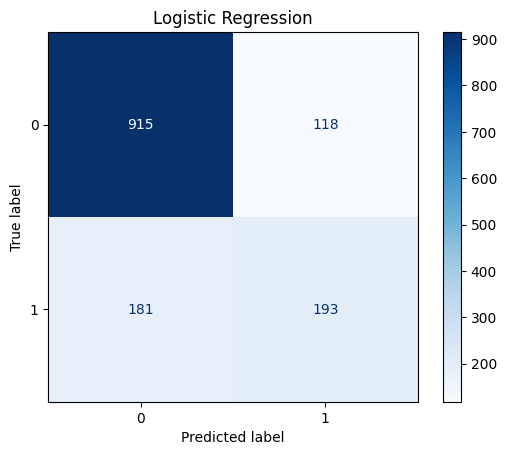

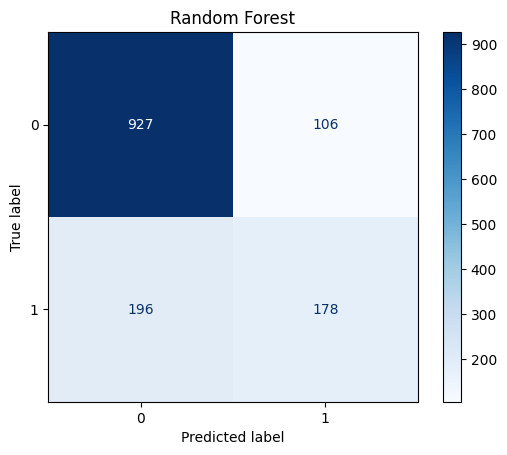

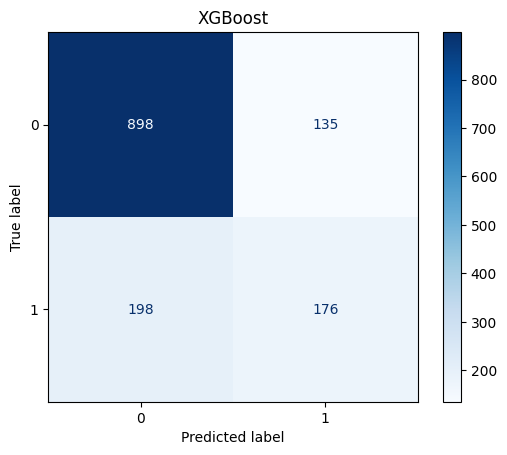

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

def plot_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

# Plot for all models
plot_conf_matrix(log_model, X_test, y_test, "Logistic Regression")
plot_conf_matrix(rf_model, X_test, y_test, "Random Forest")
plot_conf_matrix(xgb_model, X_test, y_test, "XGBoost")

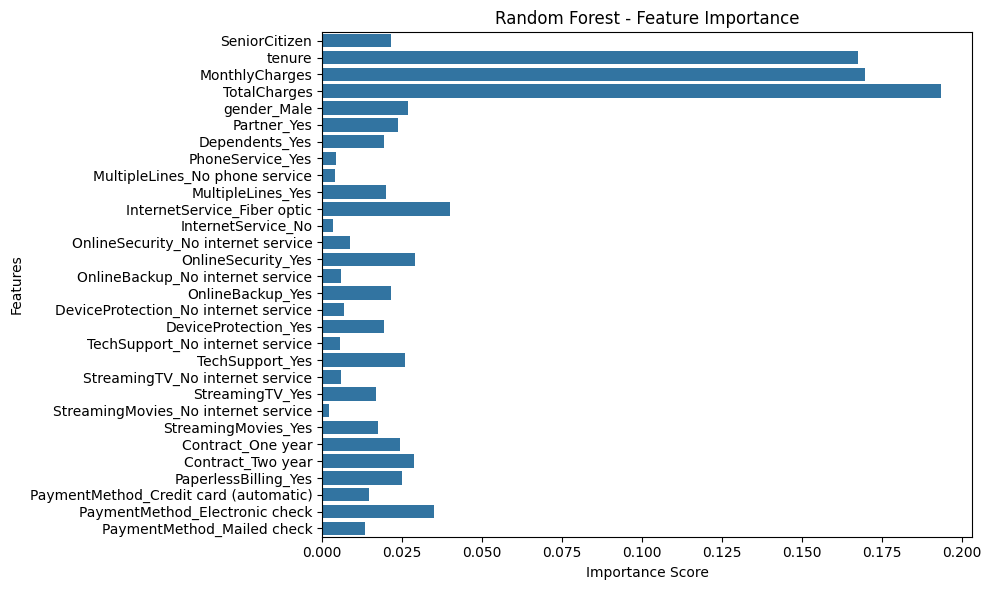

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Feature Importance
importances_rf = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances_rf, y=features)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

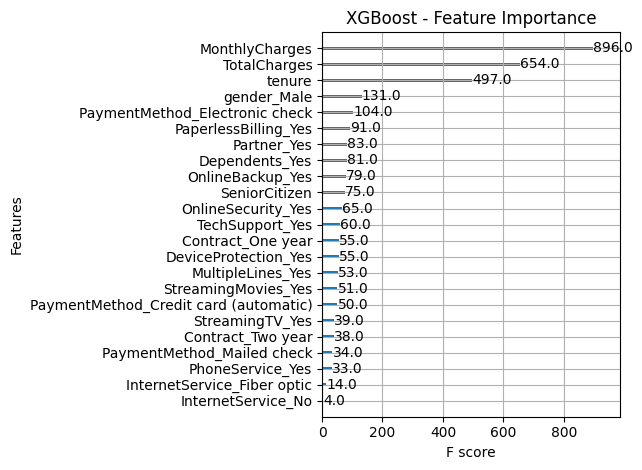

In [29]:
from xgboost import plot_importance

# XGBoost Feature Importance
plt.figure(figsize=(10,6))
plot_importance(xgb_model)
plt.title("XGBoost - Feature Importance")
plt.tight_layout()
plt.show()

In [31]:
# Predict churn probability using the best model (e.g., XGBoost)
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Get probability of class "1" (churned)

# Create a dataframe with customer index and churn probability
churn_risk = pd.DataFrame({
    'Churn_Probability': y_probs,
    'Actual_Churn': y_test.values
})
churn_risk.reset_index(drop=True, inplace=True)

# View top customers at risk
churn_risk.sort_values(by='Churn_Probability', ascending=False).head()

,Churn_Probability,Actual_Churn
712,0.983124,True
946,0.981671,True
1204,0.981359,True
1225,0.976854,True
521,0.976389,True


/tmp/ipython-input-35-2940041878.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='crest')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


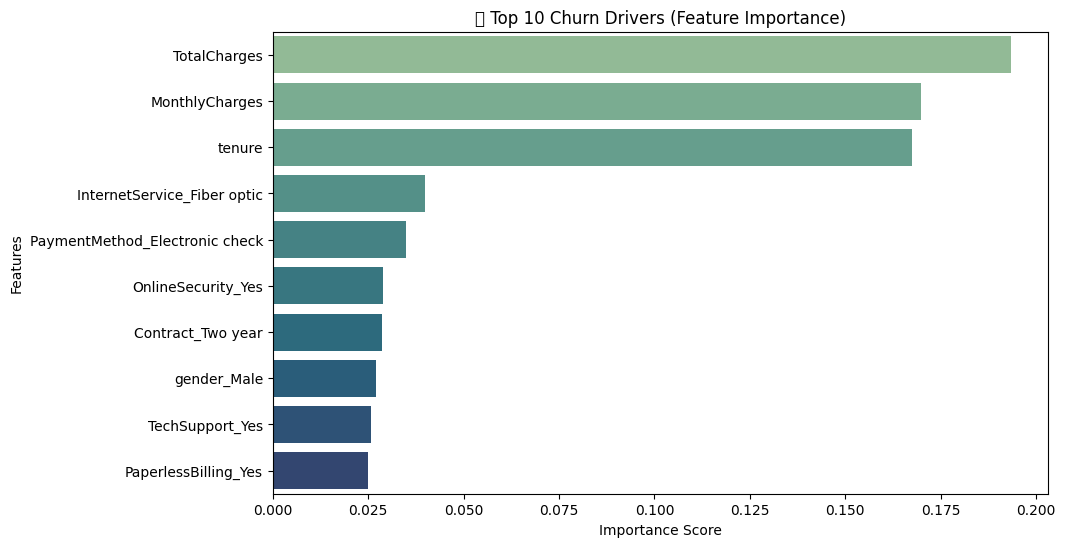

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use trained model (rf_model or xgb_model)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='crest')
plt.title("🔍 Top 10 Churn Drivers (Feature Importance)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
